# CHSH Game Demonstration

This notebook illustrates the difference between the classical and quantum strategies for the CHSH non‑local game:

1. CHSH Game has the 75 % classical limit.
2. Exhaustively enumerate classical deterministic strategies to confirm that limit.
3. Implement the optimal quantum strategy with Qiskit, simulate it, and observe the ≈ 85 % win rate.

## 1 CHSH Game Rules

* **Inputs**: 
  - Alice gets $x \in \{0, 1\}$ (uniform random) 
  - Bob gets $y \in \{0, 1\}$ (uniform random)
  - They cannot communicate after receiving their inputs.
* **Outputs**: 
  - Alice returns $a \in \{0, 1\}$
  - Bob returns $b \in \{0, 1\}$
* **Win condition**: 
  - They win the round if $a \oplus b = x \wedge y$.

A purely classical (local hidden‑variable) strategy cannot win more than 3 out of the 4 possible inputs, so the best classical success probability is 75 %.  We’ll verify that first.

In [1]:
from itertools import product

def classical_win_rate(strategy):
    """Return the success probability for a deterministic strategy.
    strategy = (a0, a1, b0, b1) where each entry is 0 or 1.
    """
    a0, a1, b0, b1 = strategy
    wins = 0
    for x, y in product([0, 1], repeat=2):
        a = a0 if x == 0 else a1
        b = b0 if y == 0 else b1
        if (a ^ b) == (x & y):
            wins += 1
    return wins / 4  # there are 4 equally likely input pairs

strategies = list(product([0, 1], repeat=4))
max_classical = max(classical_win_rate(s) for s in strategies)
print(f"Best classical win rate: {max_classical * 100:.1f}%")

Best classical win rate: 75.0%


## 2 Quantum Strategy (Tsirelson’s 85.4 %)

Below is a compact but self-contained derivation of the famous quantum value:

$
P_{\text{win}}^{\text{opt}} \;=\;\cos^{2}\!\Bigl(\tfrac{\pi}{8}\Bigr)
      \;=\;\tfrac12\Bigl(1+\tfrac{1}{\sqrt2}\Bigr)
      \;\approx\;0.8536 .
$

where $\cos^2 x = \frac{1}{2}\bigl(1+\cos(2x)\bigr)$.

### Mapping bits to signs

| Bit  ($0/1$) | Sign  ($+1/-1$) | Rule          |
| ------------ | --------------- | ------------- |
| $0$          | $+1$            | $(-1)^{0}=+1$ |
| $1$          | $-1$            | $(-1)^{1}=-1$ |

Define the observables

$
A_x = (-1)^{a},
\qquad
B_y = (-1)^{b}.
$

Each measurement bit $(a,b)$ is now represented by a sign.

### XOR becomes a product

XOR ≡ addition modulo 2:

$
a\oplus b \;=\; (a+b)\!\!\pmod{2}.
$

Exponentiation turns that sum into a product:

$
(-1)^{a}\,(-1)^{b}
      = (-1)^{\,a + b}
      = (-1)^{\,a\oplus b}.
$

Hence

$
A_x B_y = (-1)^{a\oplus b}.
$

| $a$ | $b$ | $a\oplus b$ | $A_x=(-1)^a$ | $B_y=(-1)^b$ | Product $A_xB_y$ | $(-1)^{a\oplus b}$ |
| --- | --- | ----------- | ------------ | ------------ | ---------------- | ------------------ |
| 0   | 0   | 0           | $+1$         | $+1$         | **$+1$**         | $+1$               |
| 0   | 1   | 1           | $+1$         | $-1$         | **$-1$**         | $-1$               |
| 1   | 0   | 1           | $-1$         | $+1$         | **$-1$**         | $-1$               |
| 1   | 1   | 0           | $-1$         | $-1$         | **$+1$**         | $+1$               |

The last two columns are identical, confirming the equality.

### Translating the CHSH win condition

The referee’s rule is

$
a\oplus b \;=\; x\wedge y.
$

Convert both sides to sign language:

* **Left-hand side**

  $
  A_x B_y = (-1)^{a\oplus b}.
  $

* **Right-hand side**

  $
  (-1)^{x\wedge y}
  \;=\;
  \begin{cases}
    +1 & (x,y)\in\{(0,0),\,(0,1),\,(1,0)\},\\[4pt]
    -1 & (x,y) = (1,1).
  \end{cases}
  $

Thus the players **win** precisely when

$
\boxed{\,A_x\,B_y = (-1)^{x\wedge y}\,}.
$

This multiplicative form is what one plugs into the CHSH correlator when deriving Tsirelson’s bound.









The referee picks $(x,y)$ uniformly, so the win probability is

$
P_{\text{win}}
  \;=\;\frac14\sum_{x,y\in\{0,1\}}
      \Pr\!\bigl[A_x B_y = (-1)^{x\wedge y}\bigr]
  \;=\;\frac12+\frac18\,S,
$

where

$
S \;=\;
  \langle A_0B_0\rangle +
  \langle A_0B_1\rangle +
  \langle A_1B_0\rangle -
  \langle A_1B_1\rangle
$

is the **CHSH correlator**.  Classically $|S|\le2$, hence $P_{\text{win}}\le¾$.

### Pick the optimal quantum operators

Take a shared Bell state

$
\lvert\Phi^{+}\rangle
  =\tfrac{1}{\sqrt2}\bigl(\lvert00\rangle+\lvert11\rangle\bigr),
$

and choose measurement axes in the $\{X,Z\}$ plane:

| Party | Input $0$                             | Input $1$                             |
| ----- | ------------------------------------- | ------------------------------------- |
| Alice | $A_0 = Z$                             | $A_1 = X$                             |
| Bob   | $B_0 = \tfrac{Z+X}{\sqrt2}$  ( +45° ) | $B_1 = \tfrac{Z-X}{\sqrt2}$  ( –45° ) |

These four observables all square to $\mathbb{1}$ and have eigenvalues ±1.

Geometrically, we picked axes separated by **45°**; algebraically, they satisfy

$
A_0A_1 + B_0B_1 = 0\quad\text{and}\quad
[A_i,B_j]=0.
$

### Compute the correlator $S$

On the Bell state,

$
\langle\Phi^{+}\rvert\, X\!\otimes\!X \,\lvert\Phi^{+}\rangle
  =\langle\Phi^{+}\rvert\, Z\!\otimes\!Z \,\lvert\Phi^{+}\rangle
  = +1,\qquad
\langle\Phi^{+}\rvert\, X\!\otimes\!Z \,\lvert\Phi^{+}\rangle
  =\langle\Phi^{+}\rvert\, Z\!\otimes\!X \,\lvert\Phi^{+}\rangle
  = 0.
$

Plugging the linear-combination operators:

$
\begin{aligned}
\langle A_0B_0\rangle &= \frac{1}{\sqrt2}\bigl(\langle ZZ\rangle + \langle ZX\rangle\bigr) = \tfrac{1}{\sqrt2},\\[4pt]
\langle A_0B_1\rangle &= \frac{1}{\sqrt2}\bigl(\langle ZZ\rangle - \langle ZX\rangle\bigr) = \tfrac{1}{\sqrt2},\\[4pt]
\langle A_1B_0\rangle &= \frac{1}{\sqrt2}\bigl(\langle XZ\rangle + \langle XX\rangle\bigr) = \tfrac{1}{\sqrt2},\\[4pt]
\langle A_1B_1\rangle &= \frac{1}{\sqrt2}\bigl(\langle XZ\rangle - \langle XX\rangle\bigr) = -\tfrac{1}{\sqrt2}.
\end{aligned}
$

Therefore

$
S = \tfrac{1}{\sqrt2} + \tfrac{1}{\sqrt2} + \tfrac{1}{\sqrt2} - \bigl(-\tfrac{1}{\sqrt2}\bigr)
  = 2\sqrt2 .
$

This is **Tsirelson’s bound**—the maximum attainable by quantum mechanics.

### Turn $S$ into a win probability

Insert $S=2\sqrt2$ into $P_{\text{win}} = \frac12 + \frac18 S$:

$
P_{\text{win}}^{\text{quantum}}
  = \frac12 + \frac18\,(2\sqrt2)
  = \frac12\Bigl(1 + \frac{1}{\sqrt2}\Bigr)
  = \cos^{2}\!\Bigl(\frac{\pi}{8}\Bigr)
  \approx 0.8536 \;(\text{or }85.4\%).
$

#### Why the cosine appears

Rotate one player’s measurement axes by an angle $\theta$ with respect to the
other’s; then $S = 2\,\bigl(\! \sqrt{1+\sin^{2}\theta}\bigr)$ and

$
P_{\text{win}} = \tfrac12\bigl(1+\sin\theta\bigr).
$

Maximising $\sin\theta$ under CHSH symmetry gives $\theta=\pi/4$, for which
$\sin\theta = 1/\sqrt2$.  Converting that linear-in-$\sin\theta$ formula to
a compact trigonometric identity yields $\cos^{2}(\pi/8)$.


**Take-away:** the Bell pair plus 45°-tilted measurement bases reaches
$S=2\sqrt2$, and the corresponding CHSH game success probability is

$
\boxed{\displaystyle P_{\text{win}}^{\text{opt}} = \cos^{2}\!\bigl(\pi/8\bigr)}.
$

That’s the theoretical number your notebook’s 85 % simulation is matching.

Reference: [Tsirelson's bound](https://en.wikipedia.org/wiki/Tsirelson%27s_bound).

To beat the classical limit, Alice & Bob share a maximally entangled state and measure in carefully tilted bases:

| Party | When input = 0 | When input = 1 |
|-------|---------------|---------------|
| Alice | Z basis | X basis |
| Bob   | axis at +45° between Z and X | axis at −45° between Z and X |

In circuit form that is implemented by a Bell state followed by **H** on Alice when x = 1 and **R<sub>y</sub>(±π/4)** on Bob depending on y.  We’ll build those four circuits in Qiskit and simulate them.

In [2]:
import numpy as np
from qiskit import QuantumCircuit


def create_chsh_circuit(x, y):
    """Return the Qiskit circuit that implements the optimal quantum strategy
    for the given input bits x (Alice) and y (Bob)."""
    qc = QuantumCircuit(2, 2, name=f"CHSH_{x}{y}")

    # 1) Share |Φ⁺⟩ Bell state
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    # 2) Choose measurement bases
    if x == 1:                       # Alice: X basis when x=1
        qc.h(0)

    if y == 0:                       # Bob: +45° axis
        qc.ry(-np.pi / 4, 1)
    else:                            # Bob: −45° axis
        qc.ry(+np.pi / 4, 1)

    qc.barrier()

    # 3) Measure in computational basis
    qc.measure([0, 1], [0, 1])       # Alice → c0 (LSB), Bob → c1 (MSB)
    return qc


Simulate the CHSH game and plot the results.

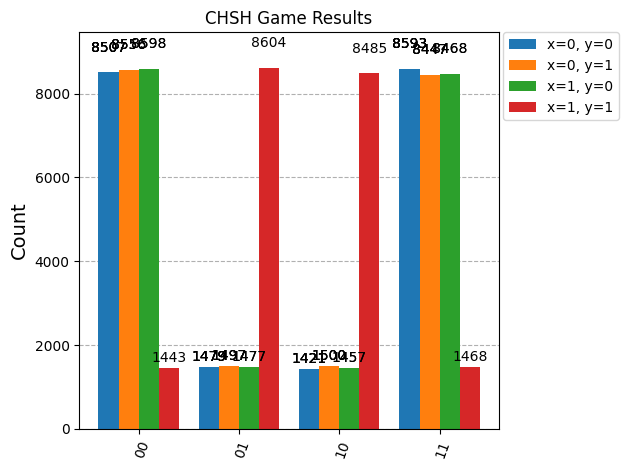

In [3]:
from qiskit_aer import AerSimulator
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram


backend = AerSimulator()  # Use statevector simulator for exact results
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
shots = 20000

circuits = []
input_pairs = list(product([0, 1], repeat=2))  # (x, y) pairs
for x, y in input_pairs:
    qc = create_chsh_circuit(x, y)
    circuits.append(qc)

qc_isa = pm.run(circuits)  # Optimize circuits
sampler = Sampler(mode=backend)
job = sampler.run(qc_isa, shots=shots)
results = job.result()

counts_list = [result.data.c.get_counts() for result in results]

# Show histogram of results

plot_histogram(
    counts_list, 
    legend=[f"x={x}, y={y}" for x, y in input_pairs],
    title="CHSH Game Results")

Show the win rates for each input pair, and the overall win rate.

In [4]:
total_wins  = 0
total_shots = 0

for (x, y), counts in zip(input_pairs, counts_list):
    for bitstring, count in counts.items():
        # Qiskit bit-string order is "b a" (MSB first)
        b = int(bitstring[0])      # Bob’s bit
        a = int(bitstring[1])      # Alice’s bit
        if (a ^ b) == (x & y):     # CHSH win condition
            total_wins += count
        total_shots += count

win_rate = total_wins / total_shots
print(f"CHSH quantum win-rate ≈ {win_rate*100:.2f}%")

P_win_quantum_theory = np.cos(np.pi / 8)**2  # ~0.8536
print(f"CHSH quantum win-rate (theory) ≈ {P_win_quantum_theory*100:.2f}%")


CHSH quantum win-rate ≈ 85.32%
CHSH quantum win-rate (theory) ≈ 85.36%


### 3 Results

* **Classical** strategies top out at **75 %** win probability.
* The **quantum** strategy simulated above achieves **≈ 85 %**, matching Tsirelson’s theoretical maximum.

This separation is an operational proof that nature cannot be described by local hidden‑variable theories.